# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

# Загрузка и подготовка данных

## Импорт библиотек и изучение общей информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statistics import mean

# снизим размерность чисел
pd.options.display.float_format = '{:.3f}'.format

In [2]:
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
# сделаем список датасетов для перебора
data_list = [data_0, data_1, data_2]

# посмотрим на общую информацию
for df in data_list:
    display(df.head())
    display(df.info())
    display(df.describe())
    print('-' * 75)

,id,f0,f1,f2,product
0,txEyH,0.706,-0.498,1.221,105.280
1,2acmU,1.335,-0.340,4.365,73.038
2,409Wp,1.023,0.152,1.420,85.266
3,iJLyR,-0.032,0.139,2.979,168.621
4,Xdl7t,1.988,0.155,4.752,154.037


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000,100000.000,100000.000,100000.000
mean,0.500,0.250,2.503,92.500
std,0.872,0.504,3.248,44.289
min,-1.409,-0.848,-12.088,0.000
25%,-0.073,-0.201,0.288,56.498
50%,0.502,0.250,2.516,91.850
75%,1.074,0.701,4.715,128.564
max,2.362,1.344,16.004,185.364


---------------------------------------------------------------------------


,id,f0,f1,f2,product
0,kBEdx,-15.001,-8.276,-0.006,3.179
1,62mP7,14.272,-3.475,0.999,26.953
2,vyE1P,6.263,-5.948,5.001,134.766
3,KcrkZ,-13.081,-11.506,4.999,137.945
4,AHL4O,12.702,-8.147,5.004,134.766


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000,100000.000,100000.000,100000.000
mean,1.141,-4.797,2.495,68.825
std,8.966,5.120,1.704,45.944
min,-31.610,-26.359,-0.018,0.000
25%,-6.299,-8.268,1.000,26.953
50%,1.153,-4.813,2.011,57.086
75%,8.621,-1.333,4.000,107.813
max,29.422,18.734,5.020,137.945


---------------------------------------------------------------------------


,id,f0,f1,f2,product
0,fwXo0,-1.147,0.963,-0.829,27.759
1,WJtFt,0.263,0.270,-2.530,56.070
2,ovLUW,0.195,0.289,-5.586,62.872
3,q6cA6,2.236,-0.554,0.930,114.573
4,WPMUX,-0.516,1.716,5.899,149.601


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000,100000.000,100000.000,100000.000
mean,0.002,-0.002,2.495,95.000
std,1.732,1.730,3.473,44.750
min,-8.760,-7.084,-11.970,0.000
25%,-1.162,-1.175,0.130,59.450
50%,0.009,-0.009,2.484,94.926
75%,1.159,1.164,4.859,130.595
max,7.238,7.845,16.739,190.030


---------------------------------------------------------------------------


### ✅ Вывод:
<div>
    <br>► Каждый датасет содержит одинаковое количество данных, по 100 000 строк и 5 колонок
    <br>► Пропуски отсутствуют
    <br>► Названия колонок соблюдают единый стиль
    <br>► С типами данных тоже всё в порядке, все численные столбцы имеют тип float
    <br>► Столбец <strong>id</strong> можно удалить, так как он является категориальным и не будет нести никакого смысла для обучения модели линейной регрессии </div>

## Предобработка данных

In [4]:
# проверим наличие явных и неявных дубликатов
for df in data_list:
    display(df.duplicated().sum())
    display(df[df.duplicated(keep='first')].count())
    print('-' * 30)

0

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

------------------------------


0

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

------------------------------


0

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

------------------------------


📌 Дублей не наблюдается, значит спокойно удаляем не нужный для дальнейшего исследования столбец

In [5]:
# удаляем категориальный столбец
for df in data_list:
    df = df.drop(['id'], axis=1, inplace=True)

📌 После того, как мы убедились в отсутствии дублей и удалили лишнюю колонку, можем проверить корреляцию признаков

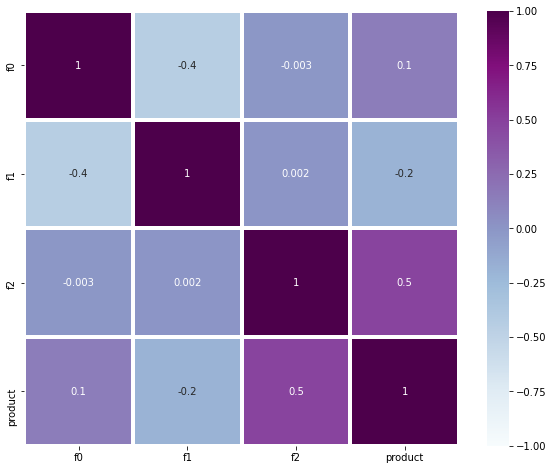

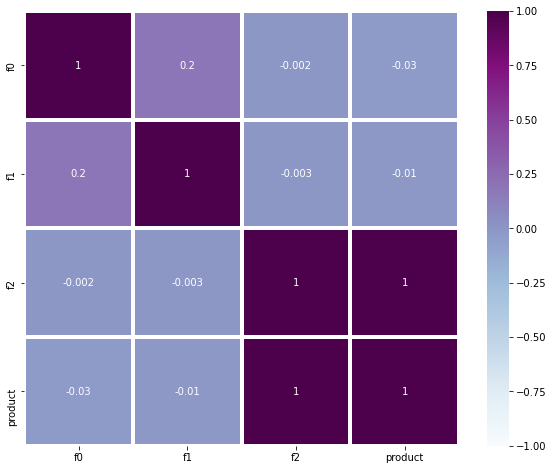

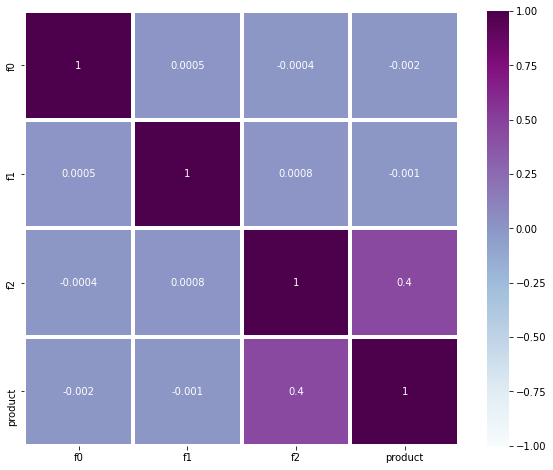

In [6]:
for df in data_list:
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(df.corr(), 
            annot=True, 
            cmap='BuPu', 
            vmin=-1, vmax=1, 
            center=0, fmt='.1g',
            linewidths=3,
            square=True);

<div>
    <br>📌 В нулевом и втором регионах наблюдается средняя положительная корреляция между f2 и целевым признаком. В первом регионе она отмечается в виде прямой связи. Скорее всего, f2 действительно сильно влияет на объём запасов в скважине
    <br>📌 Также в нулевом регионе можно отметить среднюю положительную зависимость между f0 и f1
    <br>📌 Каждый из признаков является значимым, но так как они зашифрованы, мы не сможем предположить что именно они означают, поэтому будем считать, что признак f2 имеет хорошую предсказательную силу </div>

### ✅ Вывод:
<div>
    <br>► Дубликаты не обнаружены
    <br>► Удален незначительный столбец с уникальным идентификатором скважины
    <br>► Исследована мультиколлинеарность признаков

## Обучение и проверка модели

In [7]:
# зафиксируем псевдослучайность
seed = 12345

# выберем численные признаки, которые нужно привести к единому масштабу
numeric = ['f0', 'f1', 'f2']

<br>📌 Сначала разобъем данные на признаки и целевой признак, потом на две выборки 
<br>📌 Так как численные признаки измеряются в разных единицах, а значит покрывают разные диапазоны, и, чтобы алгоритм не решил, что какой-то признак важнее другого – приведем их к единому масштабу

In [8]:
# поставим для игнорирования предупреждения SettingWithCopy
pd.options.mode.chained_assignment = None

# функция для разделения и масштабирования данных
def train_valid_split_scaler(df):
    
    features = df.drop(['product'], axis=1) # признаки
    target = df['product'] # целевой признак
    
    # разобъем данные на обучающую и валидационную выборки в соотношении 75% : 25%
    features_train, features_valid, target_train, target_valid = train_test_split(features,
                                                                                  target,
                                                                                  test_size = 0.25,
                                                                                  random_state = seed)
    # проверим, что ничего не потеряли
    display(df.shape[0] == features_train.shape[0] + features_valid.shape[0])
    
    scaler = StandardScaler() # создадим объект структуры
    scaler.fit(features_train[numeric]) # настроим на обучающих данных
    # преобразуем
    features_train[numeric] = scaler.transform(features_train[numeric])
    features_valid[numeric] = scaler.transform(features_valid[numeric])
    
    # проверим 
    display(features_train.head(2))
    display(features_valid.head(2))
    print('-' * 40)
    
    return features_train, features_valid, target_train, target_valid

In [9]:
# проверяем нулевой регион
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_valid_split_scaler(data_0)

# проверяем первый регион
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_valid_split_scaler(data_1)

# проверяем второй регион
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_valid_split_scaler(data_2)

True

,f0,f1,f2
27212,-0.545,1.390,-0.095
7866,1.456,-0.480,1.210


,f0,f1,f2
71751,0.518,-0.610,-0.126
80493,0.568,-0.086,-0.815


----------------------------------------


True

,f0,f1,f2
27212,-0.851,0.624,0.297
7866,1.972,1.832,0.294


,f0,f1,f2
71751,-0.169,0.571,0.297
80493,0.878,-1.773,-0.294


----------------------------------------


True

,f0,f1,f2
27212,-0.526,0.776,-0.401
7866,-0.890,-0.404,-1.223


,f0,f1,f2
71751,-0.837,-2.227,-0.078
80493,-0.822,0.740,-1.001


----------------------------------------


<br>📌 После того, как убедились, что всё в порядке, можем инициализировать и обучить модель линейной регрессии, а также рассчитать истинный средний запас сырья, средний запас предсказанного сырья и RMSE модели
<br>📌 Чем ниже RMSE, тем лучше модель соответствует набору данных

In [10]:
def learn_model_stats(features_train, features_valid, target_train, target_valid):
    
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    
    # вычисляем истинный средний запас сырья
    target_valid_mean = target_valid.mean()
    # вычисляем средний запас предсказанного сырья
    predictions_mean = predictions.mean()
    # вычисляем RMSE
    rmse = mean_squared_error(target_valid, predictions)**0.5 
    
    print(f'Истинный средний запас сырья: {target_valid_mean:.3f} тыс. баррелей')
    print()
    print(f'Средний запас предсказанного сырья: {predictions_mean:.3f} тыс. баррелей')
    print()
    print(f'RMSE модели: {rmse:.0f}') 
    print()
    print('-' * 75)
    print()
    
    return predictions

In [11]:
predictions_0_region = learn_model_stats(features_train_0, features_valid_0, target_train_0, target_valid_0)

predictions_1_region = learn_model_stats(features_train_1, features_valid_1, target_train_1, target_valid_1)

predictions_2_region = learn_model_stats(features_train_2, features_valid_2, target_train_2, target_valid_2)

Истинный средний запас сырья: 92.079 тыс. баррелей

Средний запас предсказанного сырья: 92.593 тыс. баррелей

RMSE модели: 38

---------------------------------------------------------------------------

Истинный средний запас сырья: 68.723 тыс. баррелей

Средний запас предсказанного сырья: 68.729 тыс. баррелей

RMSE модели: 1

---------------------------------------------------------------------------

Истинный средний запас сырья: 94.884 тыс. баррелей

Средний запас предсказанного сырья: 94.965 тыс. баррелей

RMSE модели: 40

---------------------------------------------------------------------------



### ✅ Вывод:
<div>
    <br>► Показатели нулевого и второго региона практически на одном уровне как по запасам сырья, так и по разнице между прогнозируемыми и фактическими значениями
    <br>► Наибольшая точность отмечается у модели, которая предсказывала данные для первого региона – среднеквадратическая ошибка составляет примерно 1 тыс. баррель, скорее всего, из-за влияния корреляции f2 и целевого признака. Но по объему запаса сырья данный регион является отстающим

## Подготовка к расчёту прибыли

📌 Создадим константы Python для всех ключевых значений, т.е. значения, которые никогда не меняются во время выполнения программы. Согласно PEP, константы записываются только заглавными буквами
<br>
<br>► При разведке региона исследуют 500 точек, значим определим это значение в константу TOTAL_POINTS
<br>► Из которых с помощью машинного обучения выбирают 200 лучших для разработки – BEST_POINTS
<br>► Бюджет на разработку скважин в регионе — 10 млрд рублей – BUDGET
<br>► Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей – BARREL_PRICE

In [12]:
TOTAL_POINTS = 500
BEST_POINTS = 200
BUDGET = 10**10
BARREL_PRICE = 450000

In [13]:
# делим бюджет на разработку одной новой скважины на доход с каждой единицы продукта
sufficient_product_quantity = BUDGET / BEST_POINTS / BARREL_PRICE

print(f'Достаточный объём сырья для безубыточной разработки новой скважины составляет {sufficient_product_quantity:.0f} тыс. баррелей')

Достаточный объём сырья для безубыточной разработки новой скважины составляет 111 тыс. баррелей


In [14]:
target_valid_0 = pd.Series(target_valid_0).reset_index(drop=True)
target_valid_1 = pd.Series(target_valid_1).reset_index(drop=True)
target_valid_2 = pd.Series(target_valid_2).reset_index(drop=True)
predictions_0_region = pd.Series(predictions_0_region).reset_index(drop=True)
predictions_1_region = pd.Series(predictions_1_region).reset_index(drop=True)
predictions_2_region = pd.Series(predictions_2_region).reset_index(drop=True)

In [20]:
# функция расчёта прибыли для полученного объёма сырья
def calc_profits(target, predictions):
    predictions_sorted = predictions.sort_values(ascending=False) # сортируем предсказания по убыванию
    top_200_predictions = target[predictions_sorted.index][:BEST_POINTS] # выбираем первые 200 предсказанных значений
    profits = BARREL_PRICE * top_200_predictions.sum() - BUDGET # суммируем целевое значение объёма сырья
    return profits                                          # и получаем прибыль от полученного объёма сырья

In [21]:
profits_0_region = calc_profits(target_valid_0, predictions_0_region)
print(f'Прибыль для полученного объёма сырья нулевого региона составляет {profits_0_region/ 10**9:.1f} млрд руб.')
print()

profits_1_region = calc_profits(target_valid_1, predictions_1_region)
print(f'Прибыль для полученного объёма сырья первого региона составляет {profits_1_region/ 10**9:.1f} млрд руб.')
print()

profits_2_region = calc_profits(target_valid_2, predictions_2_region)
print(f'Прибыль для полученного объёма сырья второго региона составляет {profits_2_region/ 10**9:.1f} млрд руб.')
print()

Прибыль для полученного объёма сырья нулевого региона составляет 3.3 млрд руб.

Прибыль для полученного объёма сырья первого региона составляет 2.4 млрд руб.

Прибыль для полученного объёма сырья второго региона составляет 2.7 млрд руб.



### ✅ Вывод:
<div>
    <br>► Рассчитали достаточный объем сырья для безубыточной разработки новой скважины должен быть – 111 тыс. баррелей 
    <br>► Написана функция расчёта прибыли для полученного объёма сырья. Самым прибыльным показал себя нулевой регион с доходом более 3х миллиардов рублей </div>

## Расчёт прибыли и рисков 

<div>Посчитаем риски и прибыль для каждого региона:
<br>► Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
<br>► Найдем среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.

In [22]:
state = np.random.RandomState(12345)

In [24]:
# Bootstrap с 1000 выборок

def bootstap(target, predictions):
    
    values = []
    
    for i in range(1000):
        # аргумент replace=True обеспечит выбор элементов с возвращением
        target_sample = target.sample(n=TOTAL_POINTS, replace=True, random_state=state)
        pred_sample = predictions[target_sample.index]
        values.append(calc_profits(target_sample, pred_sample))
    
    # преобразуем тип для удобства
    values = pd.Series(values)
    
    # считаем среднюю прибыль
    mean_profit = values.mean()
    
    # находим 95% доверительный интервал
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    
    # считаем риск убытков (тк это отрицательная прибыль, то подходят значения values меньше 0)
    loss_risk = (values<0).mean()
    
    print(f'Средняя прибыль составляет {mean_profit/ 10**6:.1f} млн руб.')
    print(f'95%-й доверительный интервал от {lower/ 10**6:.1f} до {upper/ 10**6:.1f} руб.')
    print(f'Риск убытков: {loss_risk:.1%}')
    print()
    print('-' * 75)
    print()
    
    return values, lower, upper, loss_risk

In [26]:
values_0, lower_0, upper_0, loss_risk_0 = bootstap(target_valid_0, predictions_0_region)

values_1, lower_1, upper_1, loss_risk_1 = bootstap(target_valid_1, predictions_1_region)

values_2, lower_2, upper_2, loss_risk_2 = bootstap(target_valid_2, predictions_2_region)

Средняя прибыль составляет 424.4 млн руб.
95%-й доверительный интервал от -102.9 до 976.6 руб.
Риск убытков: 5.2%

---------------------------------------------------------------------------

Средняя прибыль составляет 504.7 млн руб.
95%-й доверительный интервал от 77.4 до 932.9 руб.
Риск убытков: 0.9%

---------------------------------------------------------------------------

Средняя прибыль составляет 410.2 млн руб.
95%-й доверительный интервал от -195.4 до 961.3 руб.
Риск убытков: 9.0%

---------------------------------------------------------------------------



### ✅ Вывод:
<div>
    <br>► Нулевой и второй регионы по средней прибыли примерно одинаковы, и, также, оба уходят в отрицательный доверительный интервал
    <br>► После оценки рисков оставляем лишь те регионы, в которых вероятность убытков меньше 2.5%, и под данное условие нам подходит только первый регион, он же заодно является регионом с наибольшей средней прибылью
    

## Общий вывод

<div>
    <br>🔸 Мы получили три датасета, состоящих из 100 000 строк и 5 колонок, без пропусков и дубликатов, с правильными названиями колонок и нужными типами данных
    <br>🔸 ИЗбавились от неинформативного для обучения модели столбца с уникальным идентификатором скважины
    <br>🔸 Исследовали мультиколлинеарность признаков и отметили, что, скорее всего, f2 сильно влияет на объём запасов в скважине
    <br>🔸 Разбили данные на две выборки – обучающую и валидационную, в соотношении 75% к 25%, обучили модель линейной регрессии и определили, что наибольшая точность у модели, предсказавшей данные для первого региона – среднеквадратическая ошибка составляет примерно 1 тыс. баррель
    <br>🔸 Для всех ключевых значений создали константы Python, посчитали минимальное среднее количество продукта в месторождениях региона, достаточное для разработки – 111 тыс. баррелей
    <br>🔸 Написали функцию расчёта прибыли для полученного объёма сырья. Самым прибыльным показал себя нулевой регион с доходом более 3х миллиардов рублей
    <br>🔸 Провели процедура Bootstrap с 1000 выборок, нашли среднюю прибыль, 95%-й доверительный интервал и риск убытков по каждому региону
    <br>
    <br>📌 На основании вышеизложенного добывающей компании «ГлавРосГосНефть» при выборе региона, где добыча принесёт наибольшую прибыль стоит рекомендовать первый регион: по средней прибыли он превосходит остальные регионы, по риску убытков также является лучшим – риск составляет примерно 1%, у остальных же выше 2.5%, среднеквадратическая ошибка составляет примерно 1 тыс. баррель, в то время, как у остальных регионов 38 и 40 соответственно

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован